## notebook identifies carnitine compounds in ALL_GNPS library by SMILES
- must contain carnitine derivative substructure to be considered

In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import pandas as pd

In [3]:
import v_rdkit_functions
from v_rdkit_functions import mol_from_smiles_in_library
from v_rdkit_functions import substruct_search_from_smiles

In [4]:
# from v_get_ALL_GNPS_input_library.ipynb

input_library_full_df_loaded = pd.read_parquet('/home/jovyan/work/notebooks/outputs/ALL_GNPS_input_library.gzip')

In [5]:
input_library_full_df_loaded.columns

Index(['spectrum_id', 'source_file', 'task', 'scan', 'ms_level',
       'library_membership', 'spectrum_status', 'peaks_json', 'splash',
       'submit_user', 'Compound_Name', 'Ion_Source', 'Compound_Source',
       'Instrument', 'PI', 'Data_Collector', 'Adduct', 'Scan', 'Precursor_MZ',
       'ExactMass', 'Charge', 'CAS_Number', 'Pubmed_ID', 'Smiles', 'INCHI',
       'INCHI_AUX', 'Library_Class', 'SpectrumID', 'Ion_Mode', 'create_time',
       'task_id', 'user_id', 'InChIKey_smiles', 'InChIKey_inchi',
       'Formula_smiles', 'Formula_inchi', 'url', 'annotation_history'],
      dtype='object')

In [6]:
adduct_labels = ['M+H','[M+H]','[M+H]+']

In [7]:
input_library = input_library_full_df_loaded[input_library_full_df_loaded["Adduct"].isin(adduct_labels)]

In [8]:
len(input_library)

288096

In [9]:
smiles_w_rdkit_obj_dict = mol_from_smiles_in_library(input_library)

[20:20:31] SMILES Parse Error: syntax error while parsing: N/A
[20:20:31] SMILES Parse Error: Failed parsing SMILES 'N/A' for input: 'N/A'
[20:20:31] SMILES Parse Error: syntax error while parsing: 
[20:20:31] SMILES Parse Error: Failed parsing SMILES ' ' for input: ' '
[20:20:31] SMILES Parse Error: syntax error while parsing: N/A
[20:20:31] SMILES Parse Error: Failed parsing SMILES ' N/A' for input: ' N/A'
[20:20:31] SMILES Parse Error: syntax error while parsing: InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)
[20:20:31] SMILES Parse Error: Failed parsing SMILES ' InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)' for input: ' InChI=1S/C16H21NO2/c1-2-3-4-5-6-11-14-16(19)15(18)12-9-7-8-10-13(12)17-14/h7-10,19H,2-6,11H2,1H3,(H,17,18)'
[20:20:31] Can't kekulize mol.  Unkekulized atoms: 10 11 12 14 16
[20:20:32] Explicit valence for atom # 22 O, 3, is greater than permitte

In [10]:
len(smiles_w_rdkit_obj_dict)

29678

### substructure matching for carnitines

In [13]:
carnitine_derivatives = "OC(C[N+](C)(C)C)CC=O"

In [14]:
carnitine_derivatives_mol = Chem.MolFromSmiles(carnitine_derivatives)

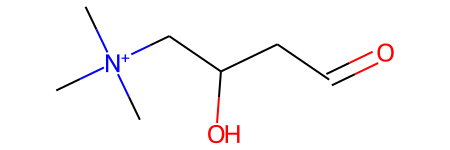

In [15]:
carnitine_derivatives_mol

In [16]:
library_df_w_carnitine_substruc = substruct_search_from_smiles(input_library, smiles_w_rdkit_obj_dict, carnitine_derivatives)

In [24]:
len(library_df_w_carnitine_substruc.Smiles.unique())

75

In [25]:
library_df_w_carnitine_substruc

,spectrum_id,source_file,task,scan,ms_level,library_membership,spectrum_status,peaks_json,splash,submit_user,...,Ion_Mode,create_time,task_id,user_id,InChIKey_smiles,InChIKey_inchi,Formula_smiles,Formula_inchi,url,annotation_history
4046,CCMSLIB00004684226,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,10bf09df91cd4bc49f11f9d042619262,1145,2,GNPS-LIBRARY,1,"[[78.831253,48.000000],[81.134575,89.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:17:01.0,fc87812c8b0f4d85811fcb06172d3d60,null,LZOSYCMHQXPBFU-UHFFFAOYSA-N,,C17H33NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
4047,CCMSLIB00004684227,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,bf7f0b1faf244732b25797393a0c8bfe,1306,2,GNPS-LIBRARY,1,"[[81.067673,58.000000],[81.868629,39.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:16:43.0,84a4551c00454d7dadf16212716efcfa,null,XOMRRQXKHMYMOC-UHFFFAOYSA-O,,C23H46NO4+,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
4048,CCMSLIB00004684228,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,a1c8ea94dcb2408aacf28b0a6b499e70,1604,2,GNPS-LIBRARY,1,"[[76.025177,28.000000],[76.907547,37.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:16:04.0,348e88fbeac0477dabad132e9bee2e67,null,XOMRRQXKHMYMOC-UHFFFAOYSA-N,,C23H45NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
4049,CCMSLIB00004684229,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,1d3b324f1cf24c119a520d1633e83122,1548,2,GNPS-LIBRARY,1,"[[77.038208,52.000000],[79.039864,68.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:15:35.0,0c9c258babc44e4d9354d1ceee93b376,null,SEXHTZQULWPHBX-UHFFFAOYSA-N,,C27H45NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
4050,CCMSLIB00004684230,f.lfnothias/TEMP/201809_TEMP_REFERENCE_N_ACYL_...,d83a0ab3796a47db81fa17fcccb28f64,1538,2,GNPS-LIBRARY,1,"[[82.021034,18.000000],[82.307793,40.000000],[...",null-null-null-null,lfnothias,...,Positive,2018-09-18 16:36:46.0,778bf693a1024b7e9d249443e967aeb5,null,MJLXQSQYKZWZCB-UHFFFAOYSA-N,,C25H45NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': ' ', 'Charge'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577880,CCMSLIB00006121167,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5049,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[60.080601,62910528.000000],[85.028198,655002...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,RDHQFKQIGNGIED-MRVPVSSYSA-N,,C9H17NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
577881,CCMSLIB00006121169,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5050,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[57.792702,2138579.000000],[60.077400,2803314...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,RDHQFKQIGNGIED-MRVPVSSYSA-N,,C9H17NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
577882,CCMSLIB00006121170,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5051,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[60.080601,50613920.000000],[73.382797,201758...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,RDHQFKQIGNGIED-MRVPVSSYSA-N,,C9H17NO4,,https://gnps.ucsd.edu/ProteoSAFe/gnpslibrarysp...,"[{'Adduct': 'M+H', 'CAS_Number': '', 'Charge':..."
577883,CCMSLIB00006121172,birmingham_pos.mgf,04aea32d6ccf4240b8b5131584ae6413,5052,2,BIRMINGHAM-UHPLC-MS-POS,1,"[[52.450199,2231351.000000],[59.031700,2142775...",null-null-null-null,mwang87,...,Positive,2021-04-15 16:26:46.0,04aea32d6ccf4240b8b5131584ae6413,null,RDHQFKQIGNGIED-MRVPVSSYSA-N,,C9H17NO4,,https://gnps.ucsd.edu/ProteoSA

In [26]:
library_df_w_carnitine_substruc.reset_index().to_csv(
    '/home/jovyan/work/notebooks/outputs/library_df_w_carnitine_substruc.csv', 
    sep=',', index=False)